Obtention des données via le site open-meteo.com 

In [270]:
import openmeteo_requests
import numpy as np
import requests_cache
from retry_requests import retry
import requests
import time 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
from scipy.stats import pearsonr
import seaborn as sns
from shapely.geometry import Point
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [271]:
commune_de_france=requests.get('https://www.data.gouv.fr/fr/datasets/r/dbe8a621-a9c4-4bc3-9cae-be1699c5ff25')
with open("communes_de_france.csv", "wb") as f:
    f.write(commune_de_france.content)

communes_de_france = pd.read_csv('communes_de_france.csv')
communes_de_france["latitude"].dropna(inplace=True)
communes_de_france["longitude"].dropna(inplace=True)

extrait_communes_de_france = communes_de_france.iloc[30001:32719] 


températures prédites en 2023 pour quelques communes de France (Ne pas lancer extremement long, des exemples de requetes courtes seront données plus bas)

In [272]:
#data_frame_storage_past_forecast=pd.DataFrame(columns=['date','temperature_2m', 'latitude', "longitude"])
		# Setup the Open-Meteo API client with cache and retry on error
"""for i in range(len(extrait_communes_de_france)):
				cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
				retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
				openmeteo = openmeteo_requests.Client(session = retry_session)

				# Make sure all required weather variables are listed here
				# The order of variables in hourly or daily is important to assign them correctly below
				url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
				params = {
					"latitude": extrait_communes_de_france["latitude"].iloc[i],
					"longitude": extrait_communes_de_france["longitude"].iloc[i],
					"start_date": "2023-01-01",
					"end_date": "2023-12-31",
					"hourly": "temperature_2m",
					"models": "meteofrance_seamless"
				}
				responses = openmeteo.weather_api(url, params=params)
								# Process first location. Add a for-loop for multiple locations or weather models
				response = responses[0]
				# Process hourly data. The order of variables needs to be the same as requested.
				hourly = response.Hourly()
				hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

				hourly_data = {"date": pd.date_range(
					start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
					end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
					freq = pd.Timedelta(seconds = hourly.Interval()),
					inclusive = "left"
				)}
				hourly_data["temperature_2m"] = hourly_temperature_2m


				hourly_dataframe = pd.DataFrame(data = hourly_data)
				hourly_dataframe.dropna(inplace=True)
				hourly_dataframe["latitude"] = [extrait_communes_de_france["latitude"].iloc[i] for k in range(len(hourly_dataframe))]
				hourly_dataframe["longitude"] = [extrait_communes_de_france["longitude"].iloc[i] for k in range(len(hourly_dataframe))]
				data_frame_storage_past_forecast = pd.concat([data_frame_storage_past_forecast, hourly_dataframe], axis=0)
				time.sleep(0.5)
				print(i)
                
nom='température4_predites.csv'
data_frame_storage_past_forecast.to_csv(nom)
"""



'for i in range(len(extrait_communes_de_france)):\n\t\t\t\tcache_session = requests_cache.CachedSession(\'.cache\', expire_after = 3600)\n\t\t\t\tretry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)\n\t\t\t\topenmeteo = openmeteo_requests.Client(session = retry_session)\n\n\t\t\t\t# Make sure all required weather variables are listed here\n\t\t\t\t# The order of variables in hourly or daily is important to assign them correctly below\n\t\t\t\turl = "https://historical-forecast-api.open-meteo.com/v1/forecast"\n\t\t\t\tparams = {\n\t\t\t\t\t"latitude": extrait_communes_de_france["latitude"].iloc[i],\n\t\t\t\t\t"longitude": extrait_communes_de_france["longitude"].iloc[i],\n\t\t\t\t\t"start_date": "2023-01-01",\n\t\t\t\t\t"end_date": "2023-12-31",\n\t\t\t\t\t"hourly": "temperature_2m",\n\t\t\t\t\t"models": "meteofrance_seamless"\n\t\t\t\t}\n\t\t\t\tresponses = openmeteo.weather_api(url, params=params)\n\t\t\t\t\t\t\t\t# Process first location. Add a for-loop for multiple

températures prédites en 2023 pour quelques communes de France

In [273]:
"""data_frame_storage_past_forecast=pd.DataFrame(columns=['date','temperature_2m', 'latitude', "longitude"])
# Setup the Open-Meteo API client with cache and retry on error
for i in range(len(extrait_communes_de_france)):
    cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
    retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
    openmeteo = openmeteo_requests.Client(session = retry_session)

    # Make sure all required weather variables are listed here
    # The order of variables in hourly or daily is important to assign them correctly below
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
			"latitude": extrait_communes_de_france["latitude"].iloc[i],
			"longitude": extrait_communes_de_france["longitude"].iloc[i],
			"start_date": "2023-01-01",
			"end_date": "2023-12-31",
			"hourly": "temperature_2m"
    }
    responses = openmeteo.weather_api(url, params=params)

    # Process first location. Add a for-loop for multiple locations or weather models
    response = responses[0]
    # Process hourly data. The order of variables needs to be the same as requested.
    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

    hourly_data = {"date": pd.date_range(
        start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
        end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
        freq = pd.Timedelta(seconds = hourly.Interval()),
        inclusive = "left"
    )}
    hourly_data["temperature_2m"] = hourly_temperature_2m

    hourly_dataframe = pd.DataFrame(data = hourly_data)
    hourly_dataframe.dropna(inplace=True)
    hourly_dataframe["latitude"] = [extrait_communes_de_france["latitude"].iloc[i] for k in range(len(hourly_dataframe))]
    hourly_dataframe["longitude"] = [extrait_communes_de_france["longitude"].iloc[i] for k in range(len(hourly_dataframe))]
    data_frame_storage_past_forecast = pd.concat([data_frame_storage_past_forecast, hourly_dataframe], axis=0)
    time.sleep(0.5)
    print(i)
    
nom='température4_reelles.csv'
data_frame_storage_past_forecast.to_csv(nom)"""




'data_frame_storage_past_forecast=pd.DataFrame(columns=[\'date\',\'temperature_2m\', \'latitude\', "longitude"])\n# Setup the Open-Meteo API client with cache and retry on error\nfor i in range(len(extrait_communes_de_france)):\n    cache_session = requests_cache.CachedSession(\'.cache\', expire_after = -1)\n    retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)\n    openmeteo = openmeteo_requests.Client(session = retry_session)\n\n    # Make sure all required weather variables are listed here\n    # The order of variables in hourly or daily is important to assign them correctly below\n    url = "https://archive-api.open-meteo.com/v1/archive"\n    params = {\n\t\t\t"latitude": extrait_communes_de_france["latitude"].iloc[i],\n\t\t\t"longitude": extrait_communes_de_france["longitude"].iloc[i],\n\t\t\t"start_date": "2023-01-01",\n\t\t\t"end_date": "2023-12-31",\n\t\t\t"hourly": "temperature_2m"\n    }\n    responses = openmeteo.weather_api(url, params=params)\n\n    #

Préparation du fichier contenant les températures (le fichier final est sur le ssp cloud )

In [ ]:
"""communes_de_france_temp_reelle4 = pd.read_csv('température4_reelles.csv')
communes_de_france_temp_predite4 = pd.read_csv('température4_predites.csv')"""

In [275]:
"""communes_de_france_temp_reelle4 = communes_de_france_temp_reelle4.rename(columns={communes_de_france_temp_reelle4.columns[0]: 'compteur'})


température4_merged = pd.merge(communes_de_france_temp_predite4,communes_de_france_temp_reelle4, on=['date', 'longitude', 'latitude'])

new_name1 = {'temperature_2m_x' :  'temperature_2m', 'temperature_2m_y' : 'temperature_reelle_2m'}
température=température4_merged.rename(columns=new_name1)

print(température)"""


          Unnamed: 0                       date  temperature_2m   latitude  \
0                  0  2023-01-01 00:00:00+00:00         10.7935  47.620239   
1                  1  2023-01-01 01:00:00+00:00         10.5435  47.620239   
2                  2  2023-01-01 02:00:00+00:00         10.0435  47.620239   
3                  3  2023-01-01 03:00:00+00:00          9.2935  47.620239   
4                  4  2023-01-01 04:00:00+00:00          9.6935  47.620239   
...              ...                        ...             ...        ...   
30012135        8755  2023-12-31 19:00:00+00:00          7.2150  49.536044   
30012136        8756  2023-12-31 20:00:00+00:00          6.9650  49.536044   
30012137        8757  2023-12-31 21:00:00+00:00          6.6150  49.536044   
30012138        8758  2023-12-31 22:00:00+00:00          6.5150  49.536044   
30012139        8759  2023-12-31 23:00:00+00:00          6.5150  49.536044   

          longitude  compteur  temperature_reelle_2m  
0       

In [ ]:
"""température.to_csv('température4')"""

In [277]:
#ouverture d'un fichiers pour l'instant pas toutes les communes car très long à obtenir mais un jour peut-être !
température = pd.read_csv('température4.csv')

Finalisation du data frame : on renomme les colonnes pour éviter les confusions : temperature_2m correspond à la température (en degré Celsius) à 2m du sol prédite par météo france, tandis que temperature_2m_reelle correspond à la température effectivement relevée à 2m du sol. Les données sont ici présentées heure par heure. On ajoute les colonnes d'erreur de prévisions : la colonne erreur peut-être posisitive ou négative, tandis que l'erreur absolue est la valeur absolue de l'erreur, justifions immédiatement l'usage de cette deuxième erreur.

In [278]:
new_name1 = {'temperature_2m_x' :  'temperature_2m', 'temperature_2m_y' : 'temperature_reelle_2m'}
température=température.rename(columns=new_name1)


In [279]:
#ajout des colonnes erreur et erreur absolue. Cette dernière est importante car le modèle se trompe presque autant en positif qu'en négatif, ainsi la moyenne de l'erreur est presque nuelle, ce qui ne nous renseigne pas beaucoup 
#environ 45s à executer

température["error"]=température["temperature_2m"]-température["temperature_reelle_2m"]
température["absolute_error"]=abs(température["error"])
température['date'] = pd.to_datetime(température['date']) # pour pouvoir facilement selectionner la date 
température

,Unnamed: 0.1,Unnamed: 0,date,temperature_2m,latitude,longitude,compteur,temperature_reelle_2m,error,absolute_error
0,0,0,2023-01-01 00:00:00+00:00,10.7935,47.620239,7.300485,0,8.688001,2.105499,2.105499
1,1,1,2023-01-01 01:00:00+00:00,10.5435,47.620239,7.300485,1,9.338000,1.205500,1.205500
2,2,2,2023-01-01 02:00:00+00:00,10.0435,47.620239,7.300485,2,9.088000,0.955500,0.955500
3,3,3,2023-01-01 03:00:00+00:00,9.2935,47.620239,7.300485,3,11.138001,-1.844501,1.844501
4,4,4,2023-01-01 04:00:00+00:00,9.6935,47.620239,7.300485,4,11.988000,-2.294500,2.294500
...,...,...,...,...,...,...,...,...,...,...
30012135,30012135,8755,2023-12-31 19:00:00+00:00,7.2150,49.536044,1.274291,8755,6.643500,0.571500,0.571500
30012136,30012136,8756,2023-12-31 20:00:00+00:00,6.9650,49.536044,1.274291,8756,6.443500,0.521500,0.521500
30012137,30012137,8757,2023-12-31 21:00:00+00:00,6.6150,49.536044,1.274291,8757,6.293500,0.321500,0.321500
30012138,30012138,8758,2023-12-31 22:00:00+00:00,6.5150,49.536044,1.274291,8758,6.293500,0.221500,0.221500


In [280]:
température.describe()

,Unnamed: 0.1,Unnamed: 0,temperature_2m,latitude,longitude,compteur,temperature_reelle_2m,error,absolute_error
count,3.001214e+07,3.001214e+07,3.001214e+07,3.001214e+07,3.001214e+07,3.001214e+07,3.001214e+07,3.001214e+07,3.001214e+07
mean,1.500607e+07,4.377007e+03,1.178816e+01,4.677136e+01,4.774628e+00,4.377007e+03,1.153931e+01,2.488530e-01,1.223032e+00
std,8.663759e+06,2.527363e+03,8.239208e+00,1.044374e+00,2.078478e+00,2.527363e+03,8.286451e+00,1.680122e+00,1.178530e+00
min,0.000000e+00,0.000000e+00,-2.455100e+01,4.512337e+01,-4.115236e-01,0.000000e+00,-2.775550e+01,-1.524900e+01,0.000000e+00
25%,7.503035e+06,2.188000e+03,5.817500e+00,4.587460e+01,4.475200e+00,2.188000e+03,5.717500e+00,-6.470001e-01,4.070020e-01
50%,1.500607e+07,4.377000e+03,1.125650e+01,4.652006e+01,5.513290e+00,4.377000e+03,1.111600e+01,2.330000e-01,8.940010e-01
75%,2.250910e+07,6.566000e+03,1.753250e+01,4.765055e+01,6.248441e+00,6.566000e+03,1.753250e+01,1.097000e+00,1.660001e+00
max,3.001214e+07,8.759000e+03,4.224550e+01,4.998521e+01,7.584537e+00,8.759000e+03,4.221800e+01,1.743900e+01,1.743900e+01


Aisni on remarque que la moyenne d'erreur sur l'échantillon de communes selectionnées est proche de 0 : en effet on s'attend à ce que le modèle se trompe autant en positif qu'en négatif, alors que l'écart absolue est en moyenne de 1.22°C.
le modèle s'est au maximum trompé de 17,43°C ! 
Tracons pour mieux visualiser les erreurs du modèle.

C:\Users\tsang\AppData\Local\Temp\ipykernel_2808\2354600440.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(température['error'])


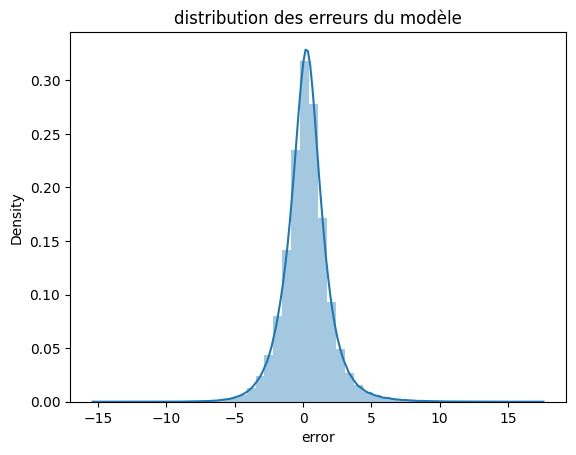

In [ ]:
#environ 1m30s à executer

plt.figure()
sns.distplot(température['error'])
plt.title("distribution des erreurs du modèle")
plt.show()

On observe une belle Gaussienne (presque centrée) dans la distribution des erreurs du modèle. Cependant, le nombre d'erreurs assez importantes est assez conséquent. Etudions la répartion des erreurs dites inacceptable (celle dont l'erreur est supérieur à 10°C, un tel écart pourrait nous faire prendre froid assez facilement ! d'où l'inacceptabilité de l'erreur)

In [282]:
température['date'] = pd.to_datetime(température['date']) # pour pouvoir facilement selectionner la date 

In [283]:
important_error=température[température["absolute_error"]>=10] # on regarde où et quand ont eu lieu les ecarts de prévisions importants ie supérieurs à 7°C 

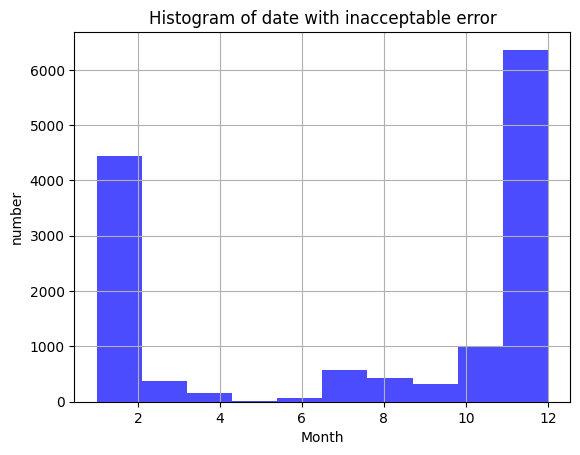

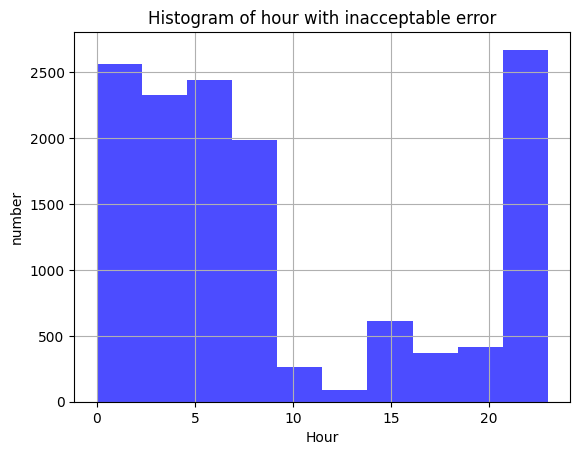

In [285]:
# Create the histogram
plt.hist(important_error["date"].dt.month, alpha=0.7, color='b')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('number')
plt.title('Histogram of date with inacceptable error')
plt.grid(True)

# Show the plot
plt.show()

# Create the histogram
plt.hist(important_error["date"].dt.hour, alpha=0.7, color='b')

# Customize the plot
plt.xlabel('Hour')
plt.ylabel('number')
plt.title('Histogram of hour with inacceptable error')
plt.grid(True)

# Show the plot
plt.show()

On remarque que le modèle semble se tromper particulièrement en hiver, fin automne et début printemps, avec un nombre d'erreur minimal en mai. Et principalement durant la nuit. 

Regardons maintenant quels sont les communes de l'échantillon, cela nous premettra peut-être de mieux comprendre d'où proviennent ces erreurs

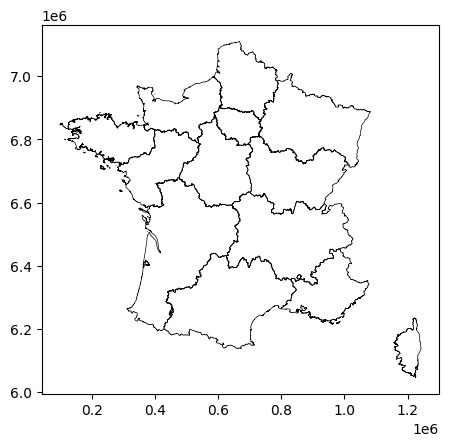

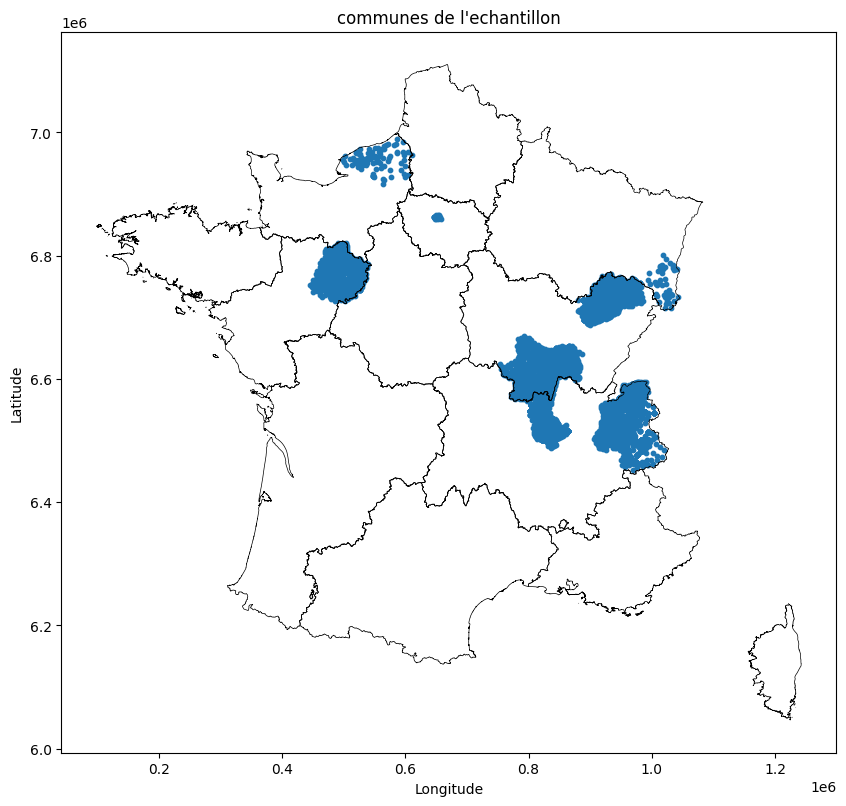

In [286]:
from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)
france = france.loc[france["INSEE_REG"] > 10]
france_2154 = france.to_crs(2154)
ax1 = france_2154.boundary.plot(edgecolor="k", linewidth=0.5)
# Convertir le DataFrame pandas en GeoDataFrame avec la projection EPSG:4326

liste_commune= température[température["compteur"]==1]

geometry = [Point(xy) for xy in zip(liste_commune["longitude"], liste_commune["latitude"])]
geo_result = gpd.GeoDataFrame(liste_commune, geometry=geometry, crs="EPSG:4326")

# Reprojections de vos points en Lambert-93 (pour correspondre à france_2154)
geo_result_2154 = geo_result.to_crs(2154)

# Afficher la carte avec la France et les températures sur celle-ci
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les frontières de la France métropolitaine
france_2154.boundary.plot(ax=ax, edgecolor="k", linewidth=0.5)

# Afficher les points de température sur la carte
# Utiliser une couleur pour représenter la température
geo_result_2154.plot(ax=ax, markersize=10, legend=True)

# Afficher la carte avec les légendes
plt.title("communes de l'echantillon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Il y a Paris, les communes de la Sarte, les communes de Savoie, de la Seine maritime, du Rhone... (Les communes sont rangées dans l'odre alphabétique des déprtements) Mais Est ce que les erreurs inacceptables sont réparties sur l'ensemble de ces communes ? 

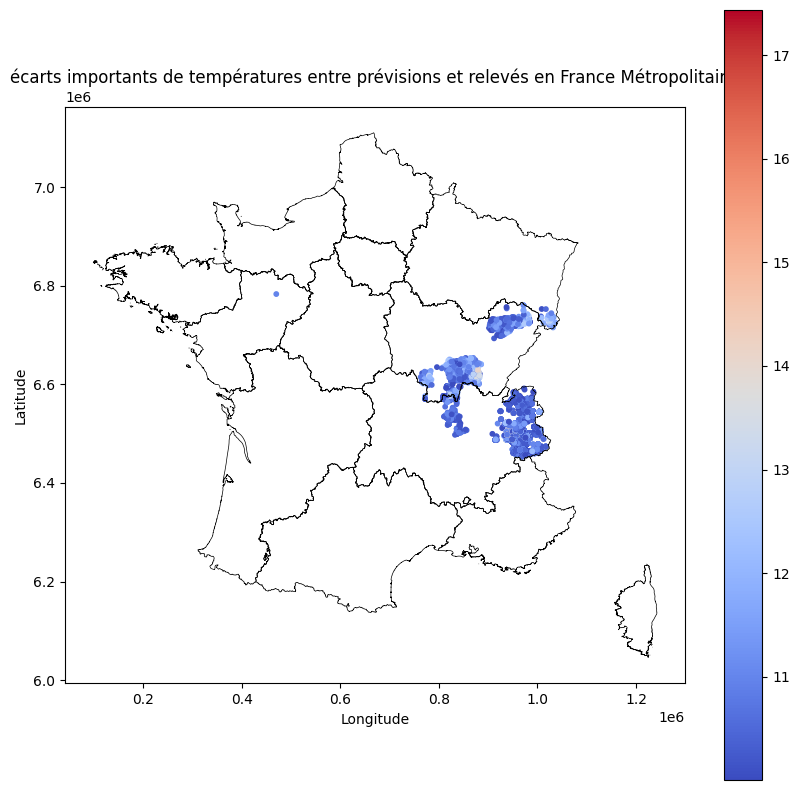

In [287]:
# Convertir le DataFrame pandas en GeoDataFrame avec la projection EPSG:4326
geometry = [Point(xy) for xy in zip(important_error["longitude"], important_error["latitude"])]
geo_result = gpd.GeoDataFrame(important_error, geometry=geometry, crs="EPSG:4326")

# Reprojections de vos points en Lambert-93 (pour correspondre à france_2154)
geo_result_2154 = geo_result.to_crs(2154)

# Afficher la carte avec la France et les températures sur celle-ci
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les frontières de la France métropolitaine
france_2154.boundary.plot(ax=ax, edgecolor="k", linewidth=0.5)

# Afficher les points de température sur la carte
# Utiliser une couleur pour représenter la température
geo_result_2154.plot(ax=ax, column="absolute_error", cmap="coolwarm", markersize=10, legend=True)

# Afficher la carte avec les légendes
plt.title("écarts importants de températures entre prévisions et relevés en France Métropolitaine")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

On voit ainsi que la répartition des erreurs inacceptables se situe plutot dans les régions montagneuses de l'echantillon. Pour essayer de comprendre d'où proviennent les erreurs focalisons nous sur une ville ayant de nombreuses erreurs inacceptable : 

In [288]:
def compte_couple(data_frame):
    dico=dict()
    for i in range(len(data_frame)):
        couple=(data_frame["latitude"].iloc[i],data_frame["longitude"].iloc[i])
        if couple in dico:
            dico[couple]+=1
        else:
            dico[couple]=1
    max_value=max(dico.values())
    max_key = max(dico, key=dico.get)

    return(max_value, max_key)

compte_couple(important_error)

(1404, (np.float64(45.5274218608), np.float64(6.46078348062)))

On a donc trouvé la commune avec le plus d'erreur inacceptable en 2023, il s'agit de La Léchère 73260 en Savoie, Auvergne-Rhone-Alpes qui compte 2601 habitants ( source : https://politique.pappers.fr/commune/lechere-73260#populationLa%20L%C3%A9ch%C3%A8re ) la commune fait 134,54km² de superficie (ce qui est plus grand que Paris) et s'élève à une altitude comprise entre 411m et 2829m (Grand pic de la Lauzière ). Commencons par décrire les erreurs de prévisions que l'on observe dans cette ville ie retrouve-t-on les mêmes résultats que précedement :  


In [289]:
#séléction de la ville 
latitude_La_Lechere = 45.5274218608
longitude_La_Lechere = 6.46078348062
tolerance = 1e-6  # Tolérance (ajustez si nécessaire)

La_Lechere = température[
    (np.abs(température["latitude"] - latitude_La_Lechere) < tolerance) &
    (np.abs(température["longitude"] - longitude_La_Lechere) < tolerance)
]
La_Lechere=La_Lechere.drop_duplicates(subset=['date'])

In [290]:
La_Lechere

,Unnamed: 0.1,Unnamed: 0,date,temperature_2m,latitude,longitude,compteur,temperature_reelle_2m,error,absolute_error
23008140,23008140,0,2023-01-01 00:00:00+00:00,8.688001,45.527422,6.460783,0,6.563,2.125001,2.125001
23008146,23008146,1,2023-01-01 01:00:00+00:00,7.938000,45.527422,6.460783,1,6.363,1.575000,1.575000
23008152,23008152,2,2023-01-01 02:00:00+00:00,7.988000,45.527422,6.460783,2,5.663,2.325000,2.325000
23008158,23008158,3,2023-01-01 03:00:00+00:00,8.138001,45.527422,6.460783,3,5.163,2.975001,2.975001
23008164,23008164,4,2023-01-01 04:00:00+00:00,7.538000,45.527422,6.460783,4,4.863,2.675000,2.675000
...,...,...,...,...,...,...,...,...,...,...
23060640,23060640,8755,2023-12-31 19:00:00+00:00,2.197000,45.527422,6.460783,8755,0.463,1.734000,1.734000
23060646,23060646,8756,2023-12-31 20:00:00+00:00,2.197000,45.527422,6.460783,8756,0.763,1.434000,1.434000
23060652,23060652,8757,2023-12-31 21:00:00+00:00,2.347000,45.527422,6.460783,8757,0.513,1.834000,1.834000
23060658,23060658,8758,2023-12-31 22:00:00+00:00,2.397000,45.527422,6.460783,8758,-0.137,2.534000,2.534000


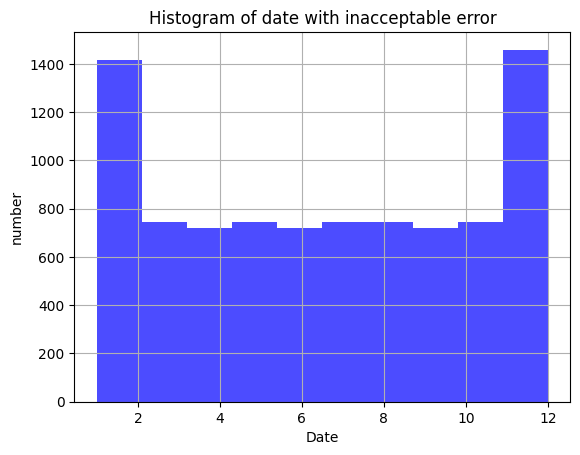

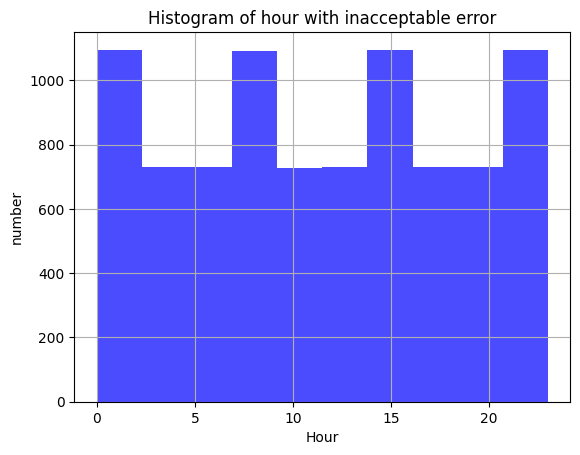

In [291]:
# Create the histogram
plt.hist(La_Lechere["date"].dt.month, alpha=0.7, color='b')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('number')
plt.title('Histogram of date with inacceptable error')
plt.grid(True)

# Show the plot
plt.show()

# Create the histogram
plt.hist(La_Lechere["date"].dt.hour, alpha=0.7, color='b')

# Customize the plot
plt.xlabel('Hour')
plt.ylabel('number')
plt.title('Histogram of hour with inacceptable error')
plt.grid(True)

# Show the plot
plt.show()

On retrouve le même biais d'erreur qui semble lié au mois choisi : décembre et janvier semble les mois les moins bien prévisibles. En ce qui concerne les heures on trouve une périodicité qui ne colle pas avec celle troucé plus haut. 

Focalisons nous sur 18h  : c'est l'heure ou les habitants sortent de l'école ou du travail et ont besoin de prévisions fiables

In [292]:
La_Lechere_18h = La_Lechere[La_Lechere["date"].dt.hour == 18] #étude à 18h 

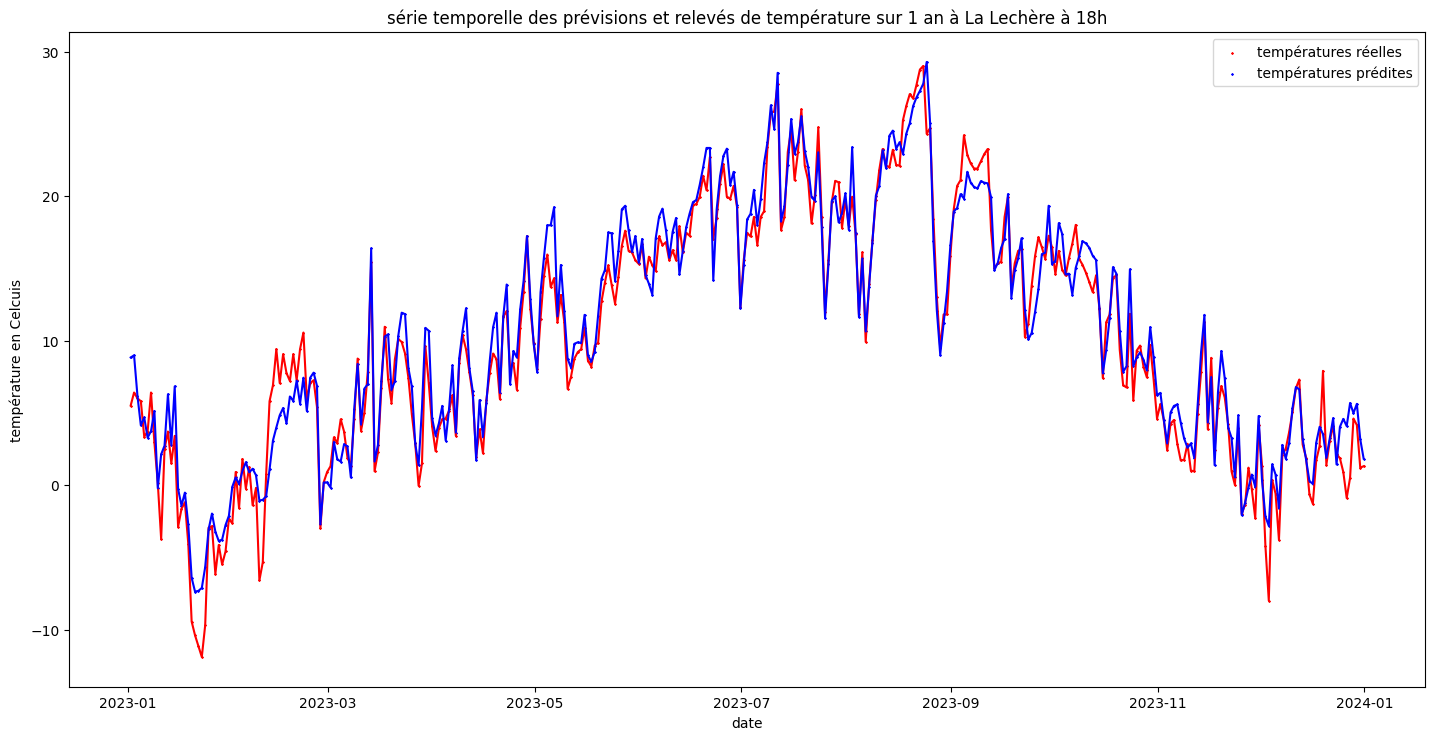

In [293]:
x = La_Lechere_18h["date"]
temperatures_reelles = La_Lechere_18h["temperature_reelle_2m"]
temperatures_predites = La_Lechere_18h["temperature_2m"]

fig = plt.figure(figsize=(17.5,8.5))

# Scatter plot the points
plt.scatter(x, temperatures_reelles, c='r', marker='X', s=0.5, label= "températures réelles") # température réelle 
plt.scatter(x, temperatures_predites, c='b', marker='X', s=0.5, label= "températures prédites")  # température prédite par le modèle 
plt.legend()
# Set labels
plt.xlabel('date')
plt.ylabel('température en Celcuis')
plt.title("série temporelle des prévisions et relevés de température sur 1 an à La Lechère à 18h")

plt.plot(x, temperatures_reelles, color='r')
plt.plot(x, temperatures_predites, color='b')

<function matplotlib.pyplot.show(close=None, block=None)>

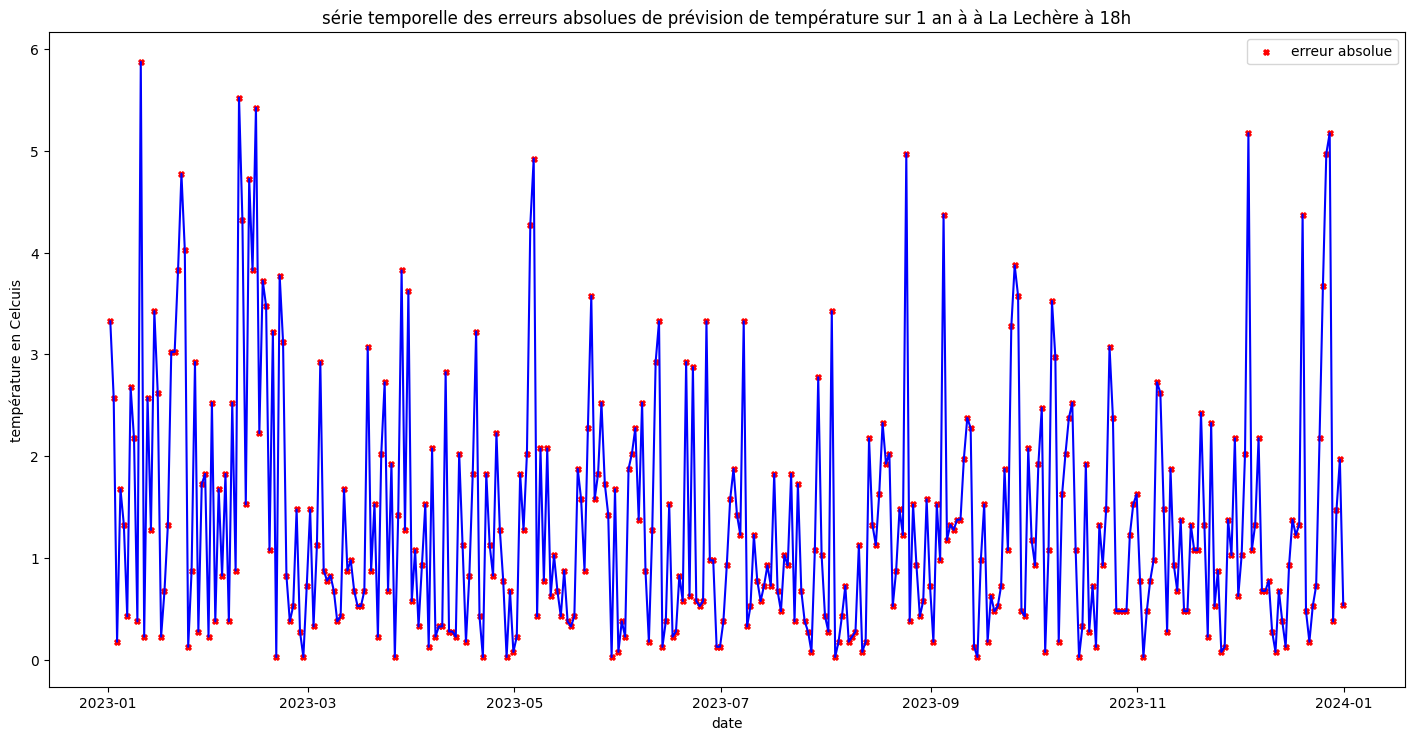

In [294]:
x = La_Lechere_18h["date"]
y1 = La_Lechere_18h["absolute_error"]


fig = plt.figure(figsize=(17.5,8.5))

# Scatter plot the points
plt.scatter(x, y1, c='r', marker='X', s=15, label= "erreur absolue") # température réelle 
plt.legend()

# Set labels
plt.xlabel('date')
plt.ylabel('température en Celcuis')
plt.title("série temporelle des erreurs absolues de prévision de température sur 1 an à à La Lechère à 18h")

plt.plot(x, y1, color='b')


plt.show

Essayons de voir si la présence ou non d'autres facteurs météorologique pourraient expliquer ces écarts. En effet La Lechere est une ville de montagne, où de nombreux autres phénomènes météorologiques peuvent survenir telle que les chutes abondantes de neige etc.

In [295]:
#On requete de nouvelles données telles que les précipitations, la profondeur de la neige et la couverture nuageuse

cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)


# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": latitude_La_Lechere,
	"longitude": longitude_La_Lechere,
	"start_date": "2023-01-01",
	"end_date": "2023-12-31",
	"hourly": ["temperature_2m", "precipitation", "snow_depth", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "wind_speed_10m"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location
response = responses[0]


# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(1).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(2).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(3).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(4).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(5).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(6).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(7).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(8).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

La_Lechere_past_data = pd.DataFrame(data = hourly_data)

La_Lechere_past_data

,date,temperature_2m,precipitation,snow_depth,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m
0,2023-01-01 00:00:00+00:00,6.563,0.0,0.28,917.387268,26.0,24.0,33.0,0.0,7.993297
1,2023-01-01 01:00:00+00:00,6.363,0.0,0.28,917.225952,28.0,22.0,25.0,0.0,4.896530
2,2023-01-01 02:00:00+00:00,5.663,0.0,0.28,917.420593,39.0,33.0,26.0,0.0,4.610250
3,2023-01-01 03:00:00+00:00,5.163,0.0,0.28,917.775940,46.0,18.0,28.0,17.0,4.394360
4,2023-01-01 04:00:00+00:00,4.863,0.0,0.28,917.934998,42.0,40.0,31.0,0.0,4.693826
...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00+00:00,0.463,0.1,0.79,905.772034,100.0,36.0,100.0,0.0,3.600000
8756,2023-12-31 20:00:00+00:00,0.763,0.2,0.80,905.883423,96.0,2.0,96.0,0.0,3.096837
8757,2023-12-31 21:00:00+00:00,0.513,2.5,0.80,907.308594,97.0,87.0,90.0,0.0,3.976330
8758,2023-12-31 22:00:00+00:00,-0.137,0.5,0.80,908.137878,95.0,94.0,25.0,0.0,2.276840


Il y a  5 lignes de trop dans les données historique : on les identifie puis on les retire 


In [297]:
print(La_Lechere_past_data.tail(20))
print(La_Lechere.tail(20))

                          date  temperature_2m  precipitation  snow_depth  \
8740 2023-12-31 04:00:00+00:00          -1.387            0.0        0.74   
8741 2023-12-31 05:00:00+00:00          -0.187            0.0        0.74   
8742 2023-12-31 06:00:00+00:00          -0.287            0.0        0.74   
8743 2023-12-31 07:00:00+00:00           0.063            0.0        0.73   
8744 2023-12-31 08:00:00+00:00           0.713            0.0        0.73   
8745 2023-12-31 09:00:00+00:00           2.413            0.0        0.73   
8746 2023-12-31 10:00:00+00:00           4.463            0.0        0.73   
8747 2023-12-31 11:00:00+00:00           6.413            0.0        0.73   
8748 2023-12-31 12:00:00+00:00           6.563            0.0        0.73   
8749 2023-12-31 13:00:00+00:00           5.363            0.0        0.73   
8750 2023-12-31 14:00:00+00:00           3.763            1.2        0.74   
8751 2023-12-31 15:00:00+00:00           2.313            4.9        0.74   

il y a les 5 heures manquantes dans les données prévisionnelles de 7h à 12 le 31 décembre 2023. on retire ces données du data frame historique :

In [298]:
La_Lechere_past_data['date'] = pd.to_datetime(La_Lechere_past_data['date'])

In [299]:
La_Lechere_past_data = La_Lechere_past_data.drop(La_Lechere_past_data.index[[8743,8744,8745,8746,8747]])

On calcul les coefficients de correlation de Pearson pour établir un lien ou non entre l'erreur absolue de prévision et d'autres facteurs météorologiques

In [301]:
x = La_Lechere["absolute_error"]
surface_pressure = La_Lechere_past_data["surface_pressure"]

corr_coeff, p_value = pearsonr(x, surface_pressure)
print(f"Coefficient de Correlation de Pearson  : {corr_coeff}")
print(f"p-value: {p_value}")

Coefficient de Correlation de Pearson  : 0.050760346065636834
p-value: 2.014769827202251e-06


In [302]:
precipitation = La_Lechere_past_data["precipitation"]

corr_coeff, p_value = pearsonr(x, precipitation)
print(f"Coefficient de Correlation de Pearson : {corr_coeff}")
print(f"p-value: {p_value}")

Coefficient de Correlation de Pearson : -0.11363474140671714
p-value: 1.4738560042453538e-26


Rien de très concluant jusque là, les coefficients de correlation sont assez faibles et les p-value sont très faibles

In [303]:
cloud_cover = La_Lechere_past_data["cloud_cover"]

corr_coeff, p_value = pearsonr(x, cloud_cover)
print(f"Coefficient de Correlation de Pearson : {corr_coeff}")
print(f"p-value: {p_value}")

Coefficient de Correlation de Pearson : -0.20854100932181707
p-value: 1.2575390368749227e-86


In [304]:
snow_depth = La_Lechere_past_data["snow_depth"]

corr_coeff, p_value = pearsonr(x, snow_depth)
print(f"Coefficient de Correlation de Pearson : {corr_coeff}")
print(f"p-value: {p_value}")

Coefficient de Correlation de Pearson : 0.2850548533967957
p-value: 2.4865830857327962e-163


Pour l'épaisseur de neige et la couverture nuageuse, on obtient de meilleurs coefficient de correlation, avec des p-value extremement faible : 0.29 et -0.20 respectivement. Les erreurs de prévisions seraient donc un peu corrélées à la présence de neige sur le sol, étudions cela plus en détail. 

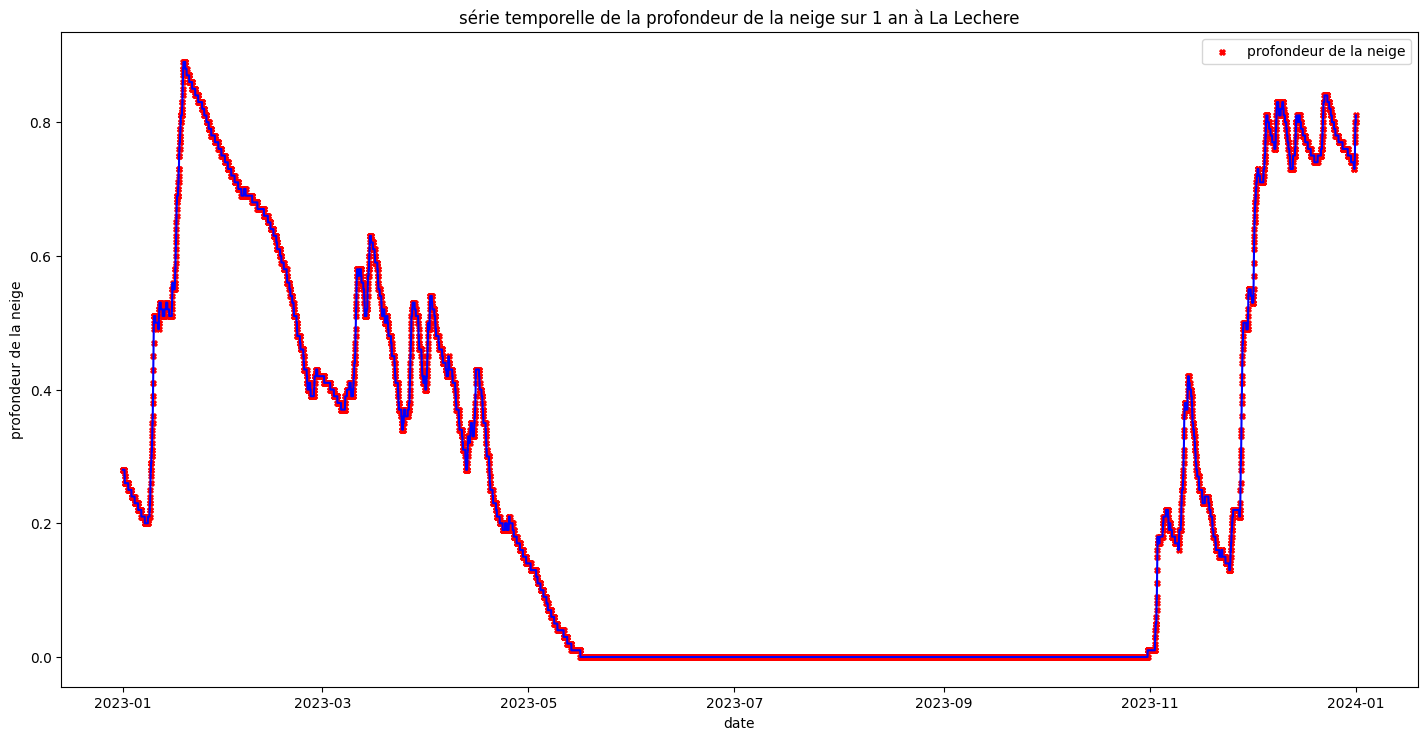

In [305]:
La_Lechere_past_data['date'] = pd.to_datetime(La_Lechere_past_data['date'])
x = La_Lechere_past_data["date"]
y1 = La_Lechere_past_data["snow_depth"]


fig = plt.figure(figsize=(17.5,8.5))

# Scatter plot the points
plt.scatter(x, y1, c='r', marker='X', s=15, label= "profondeur de la neige")  
plt.legend()

# Set labels
plt.xlabel('date')
plt.ylabel('profondeur de la neige')
plt.title("série temporelle de la profondeur de la neige sur 1 an à La Lechere")

plt.plot(x, y1, color='b')

Cepedant, comme ce graphique nous le rappel, il n'y a pas de neige l'été mais quand même des erreurs de prévisions ! superposons ce courbes pour mieux voir en retirant les valeurs lors de la fin du printemps, de l'été et du début de l'automne 

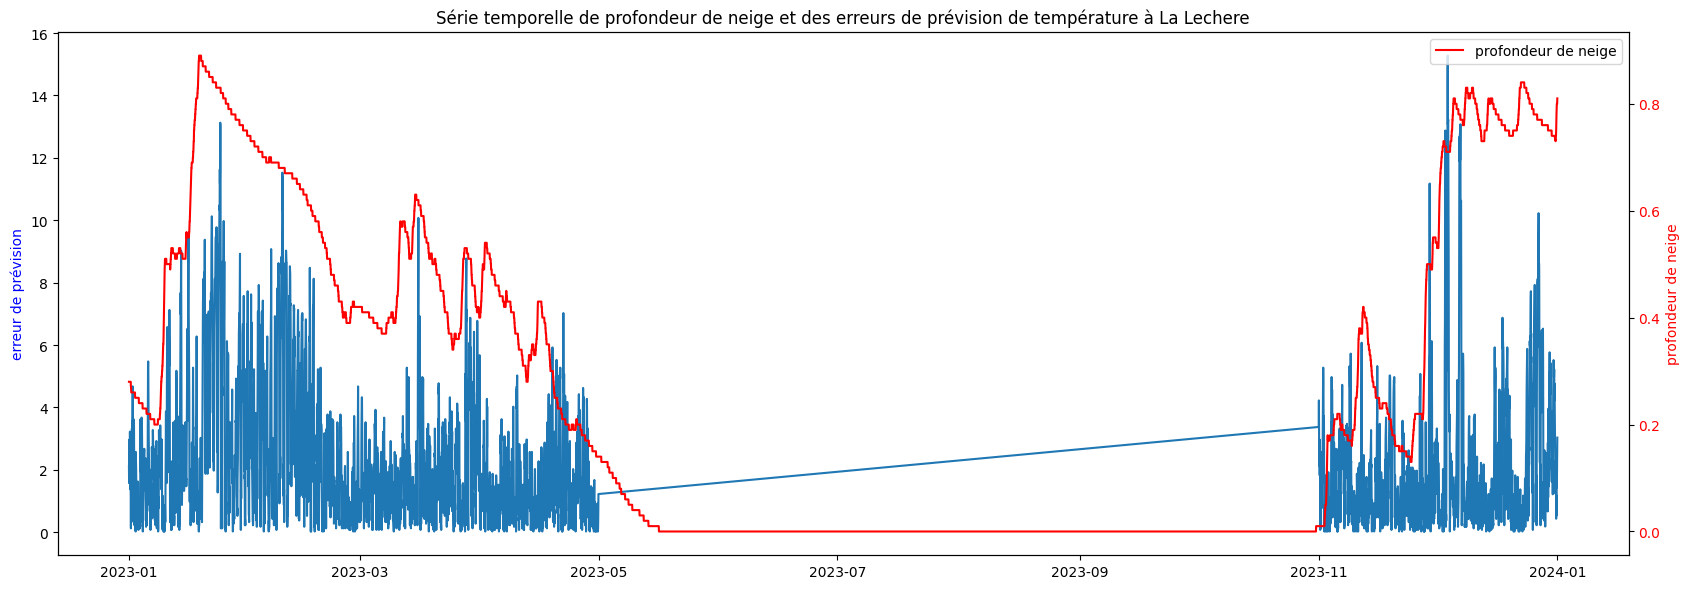

In [307]:
La_Lechere_past_data['date'] = pd.to_datetime(La_Lechere_past_data['date'])
x = La_Lechere_past_data["date"]
y1 = La_Lechere_past_data["snow_depth"]


fig, ax1 = plt.subplots(figsize=(17, 6))
plt.title('Série temporelle de profondeur de neige et des erreurs de prévision de température à La Lechere')


dates = La_Lechere_past_data["date"]
values = np.array(La_Lechere["absolute_error"])
df = pd.DataFrame({'value': values}, index=dates)


month_without_snow = [5,6, 7, 8,9,10]  #mai, juin, juillet, aout, septembre et octobre

# Création d'un Booléen pour les mois avec ou sans neige
no_snow = ~df.index.month.isin(month_without_snow)


ax1.plot(df.index[no_snow], df['value'][no_snow])
ax1.plot(df.index[~no_snow], df['value'][~no_snow],linestyle='', alpha = 0.001) 
ax1.set_ylabel('erreur de prévision', color='b')


# Création d'un second axe d'ordonné pour plus de lisibilité
ax2 = ax1.twinx()


ax2.plot(x, y1, 'r-', label='profondeur de neige')
ax2.set_ylabel('profondeur de neige', color='r') 
ax2.tick_params(axis='y', labelcolor='r') 


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")


fig.tight_layout()


plt.show()



les variations de profondeur de neige semblent en hiver mieux expliquer la présence d'erreurs de prévisions, mais est ce que retirer ces valeurs améliore réellement la corrélation entre ces variables ? 

In [308]:
dates = La_Lechere_past_data["date"]
values_error = np.array(La_Lechere["absolute_error"])
values_snow = np.array(La_Lechere_past_data["snow_depth"])

df = pd.DataFrame({'value_snow': values_snow, 'value_error' : values_error}, index=dates)

summer_months = [5,6, 7, 8,9,10] 
not_summer = ~df.index.month.isin(summer_months)
df_2 = df[not_summer]

snow_depth_winter_only = df_2["value_snow"]
date_only_winter = df_2["value_error"]

corr_coeff, p_value = pearsonr(date_only_winter, snow_depth_winter_only)
print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"p-value: {p_value}")




Pearson Correlation Coefficient: 0.3180030581763714
p-value: 1.4995108742685257e-102


Le coefficient de corrélation augmente légèrement, mais cela ne semble pas être concluant. Ainsi l'ajout d'information via de nouvelles variables météorologiques ne nous aide pas à mieux comprendre d'où proviennent les erreurs de prédiction de température. 

Essayons à présent de prédire la température réelle à partir de la prédiction faire par météo France : commençons par approximer par une fonction polynomiale l'ensemble de nos données 

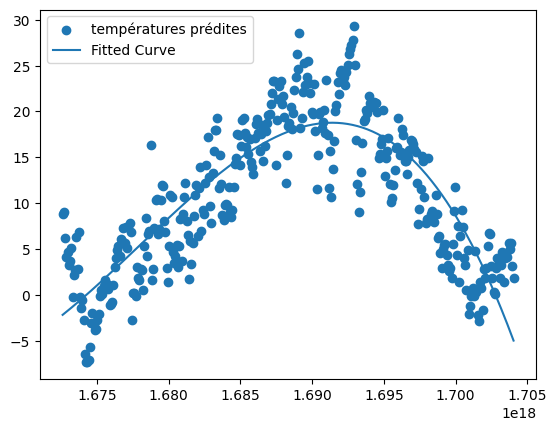

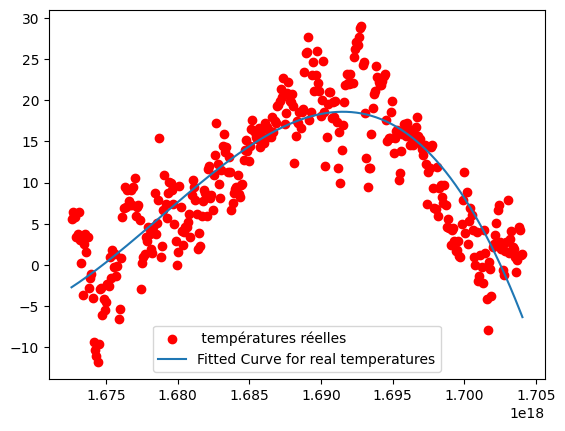

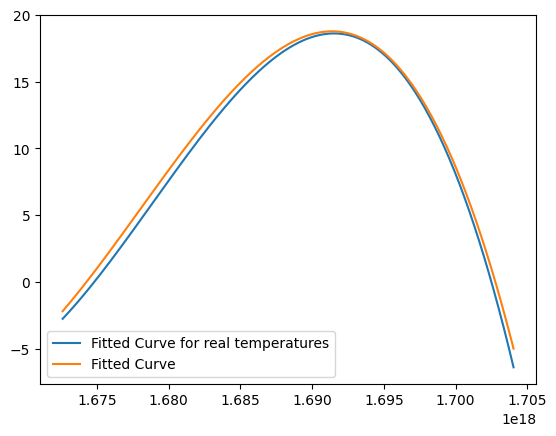

In [309]:
time = La_Lechere_18h["date"].values.astype(float) # on doit convertir les date en nombre 
real_values = La_Lechere_18h["temperature_reelle_2m"].values
values=La_Lechere_18h["temperature_2m"].values

def polynomial(x, a, b, c, d):
    return a * x**4 + b * x**3 + c*x**2 + d*x 


# Fit the curve
popt, pcov = curve_fit(polynomial, time, values )

# Plot the data and the fitted curve

plt.scatter(time, values, label='températures prédites')
plt.plot(time, polynomial(time, *popt), label='Fitted Curve')
plt.legend()
plt.show()





# Fit the curve
popt1, pcov1 = curve_fit(polynomial, time, real_values )

# Plot the data and the fitted curve

plt.scatter(time, real_values, label=' températures réelles' , c="r")
plt.plot(time, polynomial(time, *popt1), label='Fitted Curve for real temperatures')
plt.legend()
plt.show()

popt1, pcov1 = curve_fit(polynomial, time, real_values )
popt, pcov = curve_fit(polynomial, time, values )

plt.plot(time, polynomial(time, *popt1), label='Fitted Curve for real temperatures')
plt.plot(time, polynomial(time, *popt), label='Fitted Curve')
plt.legend()
plt.show()


Préparations des trainning set et des test set, évaluations du modèle avec le R2

In [315]:
dates = La_Lechere["date"]
temperatures_reelles_La_Lechere = np.array(La_Lechere["temperature_reelle_2m"])
temperatures_predites_La_Lechere = np.array(La_Lechere["temperature_2m"])
df = pd.DataFrame({'real_temp': temperatures_reelles_La_Lechere, 'prediction': temperatures_predites_La_Lechere}, index=dates)


X = df[['prediction']]  # Features (predictions)
y = df['real_temp']      # Target (real temperatures)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

rf_model = RandomForestRegressor(n_estimators=200, random_state=100, max_depth=7) #j'ai mis un peu aléatoirement je le reconnais
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 5.341984660683371
R-squared: 0.9313998129344234


On va maintenant essayer avec de nouvelles données pour cela on requete encore unefois auprès de open-meteo, toujours dans la ville de La Lechere

In [311]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
params = {
	"latitude": latitude_La_Lechere,
	"longitude": longitude_La_Lechere,
	"start_date": "2024-01-01",
	"end_date": "2024-12-25",
	"hourly": "temperature_2m",
	"models": "meteofrance_seamless"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

prevision_noel_la_lechere= pd.DataFrame(data = hourly_data)


In [316]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": latitude_La_Lechere,
	"longitude": longitude_La_Lechere,
	"start_date": "2024-01-01",
	"end_date": "2024-12-25",
	"hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m_reelle"] = hourly_temperature_2m

temperature_reelle_noel_la_lechere = pd.DataFrame(data = hourly_data)


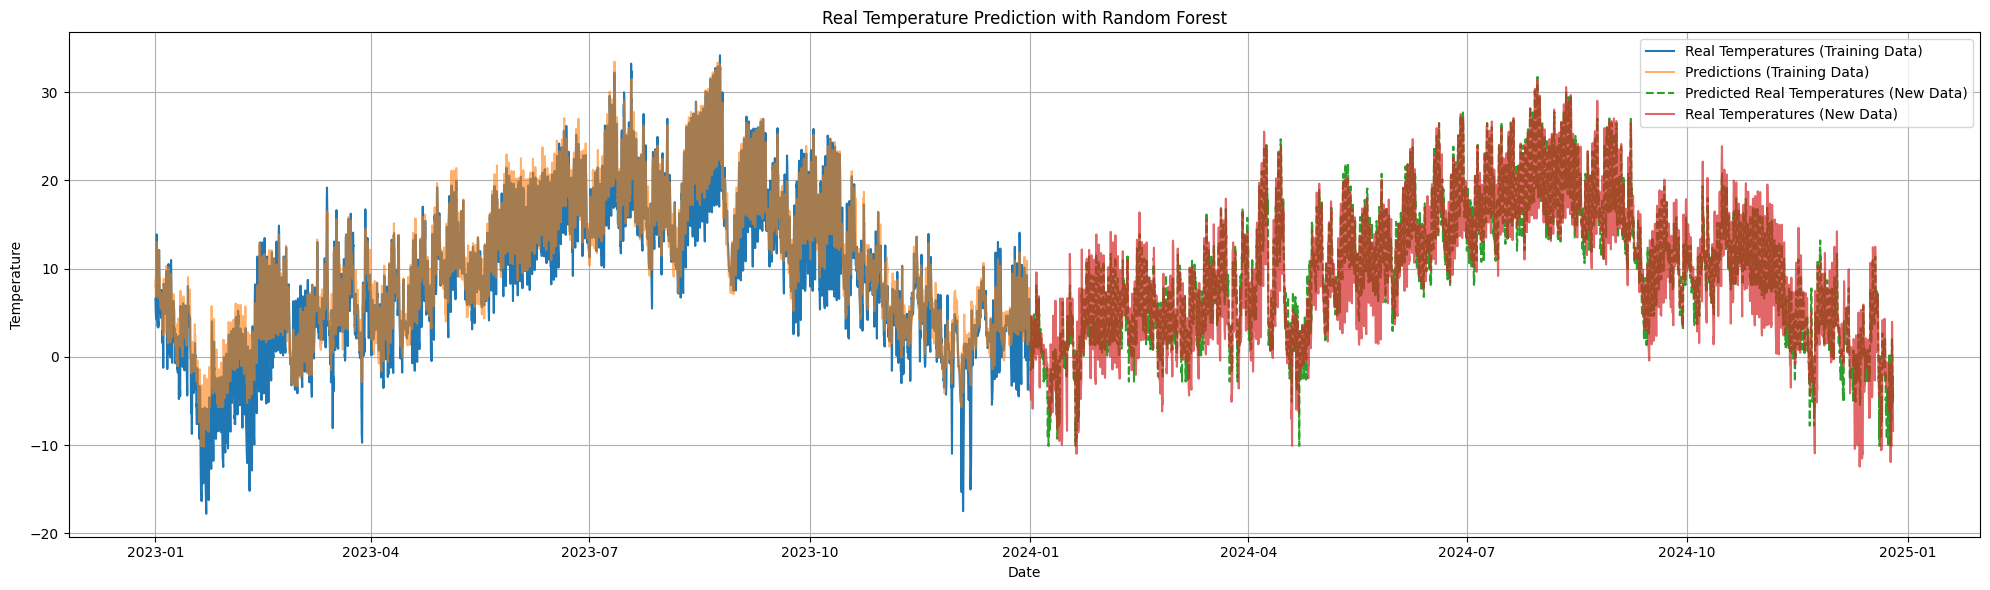

In [313]:
# New predictions with dates
new_dates = temperature_reelle_noel_la_lechere["date"]
new_predictions = np.array(prevision_noel_la_lechere["temperature_2m"])
new_real_temp = np.array(temperature_reelle_noel_la_lechere["temperature_2m_reelle"])

new_df = pd.DataFrame({'prediction': new_predictions}, index=new_dates)
new_df_real = pd.DataFrame({'real_temp' :new_real_temp}, index= new_dates)
new_X = new_df[['prediction']]
new_real_temps_predicted = rf_model.predict(new_X) 

new_df['predicted_real_temp'] = new_real_temps_predicted

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['real_temp'], label='Real Temperatures (Training Data)')
plt.plot(df.index, df['prediction'], label='Predictions (Training Data)', alpha=0.6)
plt.plot(new_df.index, new_df['predicted_real_temp'], label='Predicted Real Temperatures (New Data)', linestyle='--')
plt.plot(new_df.index, new_df_real['real_temp'],label = 'Real Temperatures (New Data)', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Real Temperature Prediction with Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Lecture : à Gauche se trouve les données d'entrainement année 2023 et à droites de nouvelles données (2024) sur lesquelles on a appliqué la prédiction par random forest

Ajoutons la température réelle au new_df 

In [317]:
new_df["temperature_2m_reelle"] = np.array(temperature_reelle_noel_la_lechere["temperature_2m_reelle"])
new_df["absolute_error of the random forest"]=abs(new_df["predicted_real_temp"]-new_df["temperature_2m_reelle"])
new_df["absolute_error of meteo  france"]=abs(new_df["prediction"]-new_df["temperature_2m_reelle"])
new_df.describe()

,prediction,predicted_real_temp,temperature_2m_reelle,absolute_error of the random forest,absolute_error of meteo france
count,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,10.637944,9.560490,9.258208,1.774917,1.966894
std,7.116212,7.489572,7.872705,1.511202,1.807782
min,-5.112000,-10.104177,-12.436999,0.000360,0.024999
25%,4.938000,3.779880,3.313000,0.666543,0.625000
50%,10.338000,9.671196,8.863000,1.407050,1.474998
75%,15.838000,15.129961,15.013000,2.477236,2.725000
max,31.487999,31.707171,31.313000,12.147915,13.275000


Le modèle de Random forest s'est en moyenne trompé de 1.77°C Mais il fait en moyenne "mieux" que Meteo France !